# **Forest Fire Prediction**</br>
Final Project FGA - AI for Junior Developer </br>
Kelompok : 
*   Aulia Fadli
*   Aiko Nur Fajrin Diapati
*   Fakhri Rizal Santosa


---


Task :</br>
Regression Task, untuk memprediksi area yang terbakar dari kebakaran hutan. Dataset berasal dari data kebakaran hutan di Negara Portugal

Source :
https://archive.ics.uci.edu/ml/datasets/forest+fires
P. Cortez and A. Morais. A Data Mining Approach to Predict Forest Fires using Meteorological Data. In J. Neves, M. F. Santos and J. Machado Eds., New Trends in Artificial Intelligence, Proceedings of the 13th EPIA 2007 - Portuguese Conference on Artificial Intelligence, December, Guimaraes, Portugal, pp. 512-523, 2007. APPIA, ISBN-13 978-989-95618-0-9.

# **Data Loading & Understanding**

In [1]:
#Importing library 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing dataset
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv")

In [3]:
df.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


## **Attribute Information**
1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: 'jan' to 'dec'
4. day - day of the week: 'mon' to 'sun'
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3
7. DC - DC index from the FWI system: 7.9 to 860.6
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40
12. rain - outside rain in mm/m2 : 0.0 to 6.4
13. area - the burned area of the forest (in ha): 0.00 to 1090.84 </br>
(this output variable is very skewed towards 0.0, thus it may make
sense to model with the logarithm transform).

In [4]:
#dataset shape
df.shape

(517, 13)

In [5]:
#check info, null dan tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X,517.0,4.669246,2.313778,1.0,3.0,4.00,7.00,9.00
Y,517.0,4.299807,1.229900,2.0,4.0,4.00,5.00,9.00
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40


In [7]:
#check missing value
df.isna().any()

X        False
Y        False
month    False
day      False
FFMC     False
DMC      False
DC       False
ISI      False
temp     False
RH       False
wind     False
rain     False
area     False
dtype: bool

In [8]:
#check unique object
#melihat apakah ada unwanted data pada dataset
for i in df.columns:
  print('Column : ',i)
  print(df[i].unique())
  print('===========================')
  print(' ')

Column :  X
[7 8 6 5 4 2 9 1 3]
 
Column :  Y
[5 4 6 3 2 9 8]
 
Column :  month
['mar' 'oct' 'aug' 'sep' 'apr' 'jun' 'jul' 'feb' 'jan' 'dec' 'may' 'nov']
 
Column :  day
['fri' 'tue' 'sat' 'sun' 'mon' 'wed' 'thu']
 
Column :  FFMC
[86.2 90.6 91.7 89.3 92.3 91.5 91.  92.5 92.8 63.5 90.9 92.9 93.3 84.9
 89.2 86.3 91.8 94.3 90.2 93.5 91.4 92.4 93.4 88.6 90.3 90.  88.1 79.5
 94.8 90.1 94.2 87.2 87.6 92.1 92.6 84.  86.6 93.  91.1 91.2 88.8 84.2
 89.7 83.9 69.  82.1 85.9 84.4 68.2 93.7 85.8 95.5 95.2 96.  85.6 81.5
 86.8 93.9 90.8 90.7 88.3 92.2 81.9 88.  83.  93.1 91.9 91.6 87.5 93.6
 84.6 85.4 84.7 86.9 85.2 90.4 53.4 85.1 89.6 50.4 88.2 92.  18.7 90.5
 84.1 85.  87.9 94.6 87.1 92.7 88.9 89.4 94.  75.1 91.3 93.2 94.9 95.
 95.1 95.8 95.9 96.2 96.1 94.5 81.6 94.4]
 
Column :  DMC
[ 26.2  35.4  43.7  33.3  51.3  85.3  88.9 145.4 129.5  88.   73.2  70.8
 126.5 133.3 141.2  35.8  32.8  27.9  27.4  78.5  96.3 110.9 139.4 142.4
 117.9 149.3  85.1  91.8  69.7  75.6  80.7  41.5  25.7  60.6  96.9 10

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count plot of months')

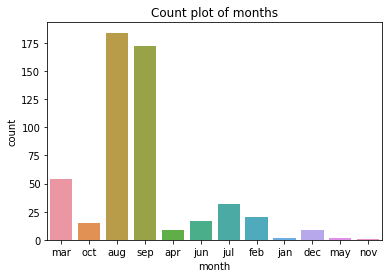

In [9]:
#visualizing months
sns.countplot(df['month'])
plt.title('Count plot of months')

## **Encoding**

In [10]:
#Encoding data hari
df['day'].replace({'mon': '1','tue': '2','wed': '3','thu': '4','fri': '5',
                        'sat': '6','sun': '7'}, inplace=True)
df["day"] = pd.to_numeric(df["day"])

In [11]:
#Encoding data bulan
df['month'].replace({'jan': '1','feb': '2','mar': '3','apr': '4','may': '5',
                        'jun': '6','jul': '7','aug': '8','sep': '9','oct': '10',
                        'nov': '11','dec': '12'}, inplace=True)
df["month"] = pd.to_numeric(df["month"])

# **Feature Engineering**

##**Season & Forest Fire** </br>
Kebakaran dapat dipengaruhi juga oleh faktor musim, mengacu pada https://www.nwcg.gov/publications/pms437/cffdrs/fire-weather-index-system, beberapa nilai pada data dapat dipengaruhi oleh musim, sehingga dilakukan penambahan fitur musim.</br>

Di negara Portugal, musim panas (summer) berlangsung antara June - mid-September. </br>
source : https://www.travelstart.co.za/blog/best-time-to-visit-portugal/#:~:text=Summer%20in%20Portugal%20sits%20between,on%20in%20autumn%20and%20spring.

In [12]:
df['summer'] = 0
temp = df[(df['month']>5)&(df['month']<=9)].index
df.loc[temp,'summer'] = 1
df['summer'].value_counts()

1    405
0    112
Name: summer, dtype: int64

dapat dilihat bahwa kebakaran di Portugal didominasi ketika musim panas

In [13]:
#merapihkan dataset
df = df[['X','Y','FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'summer', 'area']]

## **Forest Fire Area Burned > 0**
Memahami secara luas kategori data secaara analisa multivariate. Dalam standar Values of fire weather indices, teradapat beberapa parameter acuan yang dapat digunakan sebagai kelompok data, yaitu klasifikasi Low, Moderate, High dan Very High & Extreame, hal ini dapat dijadikan rujukan dengan mengkombinasikan keparahan luas area terbakar dari feature 'area'



Tabel Values of fire weather indices </br>
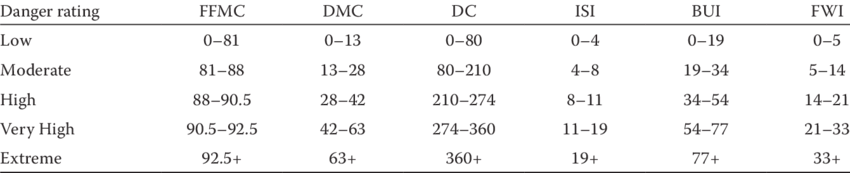

## **Multivariate with Unsupervised Algorithm**

karena konteks area aman (nilai area = 0) maka perlu splitting dataset dengan nilai lebih dari 0 (sebagai dataset terjadinya kebakaran)

### **Splitting Dataset**

In [14]:
datasetFire = df[df['area'] > 0]
datasetFire

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,summer,area
138,9,9,85.8,48.3,313.4,3.9,18.0,42,2.7,0.0,1,0.36
139,1,4,91.0,129.5,692.6,7.0,21.7,38,2.2,0.0,1,0.43
140,2,5,90.9,126.5,686.5,7.0,21.9,39,1.8,0.0,1,0.47
141,1,2,95.5,99.9,513.3,13.2,23.3,31,4.5,0.0,1,0.55
142,8,6,90.1,108.0,529.8,12.5,21.2,51,8.9,0.0,1,0.61
...,...,...,...,...,...,...,...,...,...,...,...,...
509,5,4,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,1,2.17
510,6,5,91.0,166.9,752.6,7.1,18.2,62,5.4,0.0,1,0.43
512,4,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,1,6.44
513,2,4,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,1,54.29


### **Reduce the dimensions using Principal Component Analysis (PCA)**

kami akan melakukan pelabelan data secara unsupervised menggunakan KMeans, masalah pertama adalah dataset **firePred** merupakan high dimensional data sehingga perlu dilakukan reduksi dimensi data dengan menggunakan PCA

In [15]:
#import library
from sklearn.decomposition import PCA

In [16]:
#Feature yang akan digunakan dalam proses pelabelan data
fireIndicator = ['FFMC', 'DMC', 'DC', 'ISI','area']

In [17]:
firePred = datasetFire[['FFMC', 'DMC', 'DC', 'ISI','area']]
firePred.describe()

,FFMC,DMC,DC,ISI,area
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,91.034074,114.707778,570.867037,9.177037,24.600185
std,3.709020,61.786520,229.981242,4.147350,86.501635
min,63.500000,3.200000,15.300000,0.800000,0.090000
25%,90.325000,82.900000,486.500000,6.800000,2.140000
50%,91.700000,111.700000,665.600000,8.400000,6.370000
75%,92.975000,141.300000,721.325000,11.375000,15.422500
max,96.200000,291.300000,860.600000,22.700000,1090.840000


In [18]:
# Scaling dengan Robust Scaling
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()

In [19]:
#Fungsi Normalisasi Robust Scaling
def robustScal(dtframe,label):
    dtframe[label] = rs.fit_transform(dtframe[[label]])

In [20]:
#Proses Normalisasi
for column in fireIndicator:
    robustScal(firePred,column)
firePred.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

,FFMC,DMC,DC,ISI,area
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,-0.251293,0.051503,-0.403419,0.169844,1.372497
std,1.399630,1.057988,0.979373,0.906525,6.512451
min,-10.641509,-1.857877,-2.769296,-1.661202,-0.472803
25%,-0.518868,-0.493151,-0.762696,-0.349727,-0.318464
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.481132,0.506849,0.237304,0.650273,0.681536
max,1.698113,3.075342,0.830406,3.125683,81.646527


### **Clustering with KMeans untuk Label**

**Menggunakan n = 5** </br>
sesuai klasifikasi cluster dari **Values of fire weather indices**

In [21]:
from sklearn.cluster import KMeans

In [22]:
pca_5fire = PCA(n_components=5)
pca_5fire_result = pca_5fire.fit_transform(firePred)

In [23]:
# Klasterisasi menggunakan KMeans (karena tanpa label)   
kmeans = KMeans(n_clusters=5)
kmeans.fit(firePred)

KMeans(n_clusters=5)

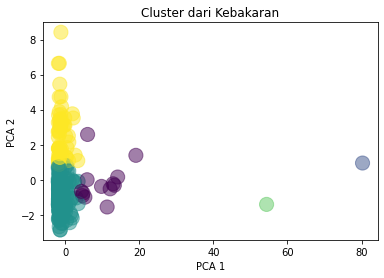

In [24]:
x = pca_5fire_result[:, 0]
y = pca_5fire_result[:, 1]

scatter = plt.scatter(x, y, c=kmeans.labels_, alpha=0.5, s= 200)
plt.title('Cluster dari Kebakaran')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.show()

In [25]:
#copy data array
labelclass = kmeans.labels_

In [26]:
#menaikan 1 nilai untuk mencegah label class = 0 (karena 0 = tidak ada kebakaran)
for index in range(len(labelclass)):
      labelclass[index] = labelclass[index] +1

In [27]:
#adding new label ke dataset fire
datasetFire['class'] = labelclass.tolist()
datasetFire

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,summer,area,class
138,9,9,85.8,48.3,313.4,3.9,18.0,42,2.7,0.0,1,0.36,5
139,1,4,91.0,129.5,692.6,7.0,21.7,38,2.2,0.0,1,0.43,3
140,2,5,90.9,126.5,686.5,7.0,21.9,39,1.8,0.0,1,0.47,3
141,1,2,95.5,99.9,513.3,13.2,23.3,31,4.5,0.0,1,0.55,3
142,8,6,90.1,108.0,529.8,12.5,21.2,51,8.9,0.0,1,0.61,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,5,4,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,1,2.17,3
510,6,5,91.0,166.9,752.6,7.1,18.2,62,5.4,0.0,1,0.43,3
512,4,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,1,6.44,5
513,2,4,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,1,54.29,5


### **Menggabungkan dataset**

In [28]:
#copy dataset dengan label 0
datasetSafe = df[df['area'] == 0]
datasetSafe

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,summer,area
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0,0.0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0,0.0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0,0.0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0,0.0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
507,2,4,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,1,0.0
508,1,2,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,1,0.0
511,8,6,81.6,56.7,665.6,1.9,27.8,35,2.7,0.0,1,0.0
515,1,4,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,1,0.0


In [29]:
#memasukan label class = 0 (aman / tidak ada kebakaran)
datasetSafe['class'] = np.zeros(247).tolist()
datasetSafe

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,summer,area,class
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0,0.0,0.0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0,0.0,0.0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0,0.0,0.0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0,0.0,0.0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,2,4,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,1,0.0,0.0
508,1,2,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,1,0.0,0.0
511,8,6,81.6,56.7,665.6,1.9,27.8,35,2.7,0.0,1,0.0,0.0
515,1,4,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,1,0.0,0.0


In [30]:
#Menggabungkan dataset fire dan dataset safe
frames = [datasetSafe, datasetFire]
newDf = pd.concat(frames)
newDf = newDf.reset_index()
newDf.drop('index', axis=1, inplace=True)
newDf

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,summer,area,class
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0,0.00,0.0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0,0.00,0.0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0,0.00,0.0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0,0.00,0.0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,5,4,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,1,2.17,3.0
513,6,5,91.0,166.9,752.6,7.1,18.2,62,5.4,0.0,1,0.43,3.0
514,4,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,1,6.44,5.0
515,2,4,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,1,54.29,5.0


# **Feature Selection**

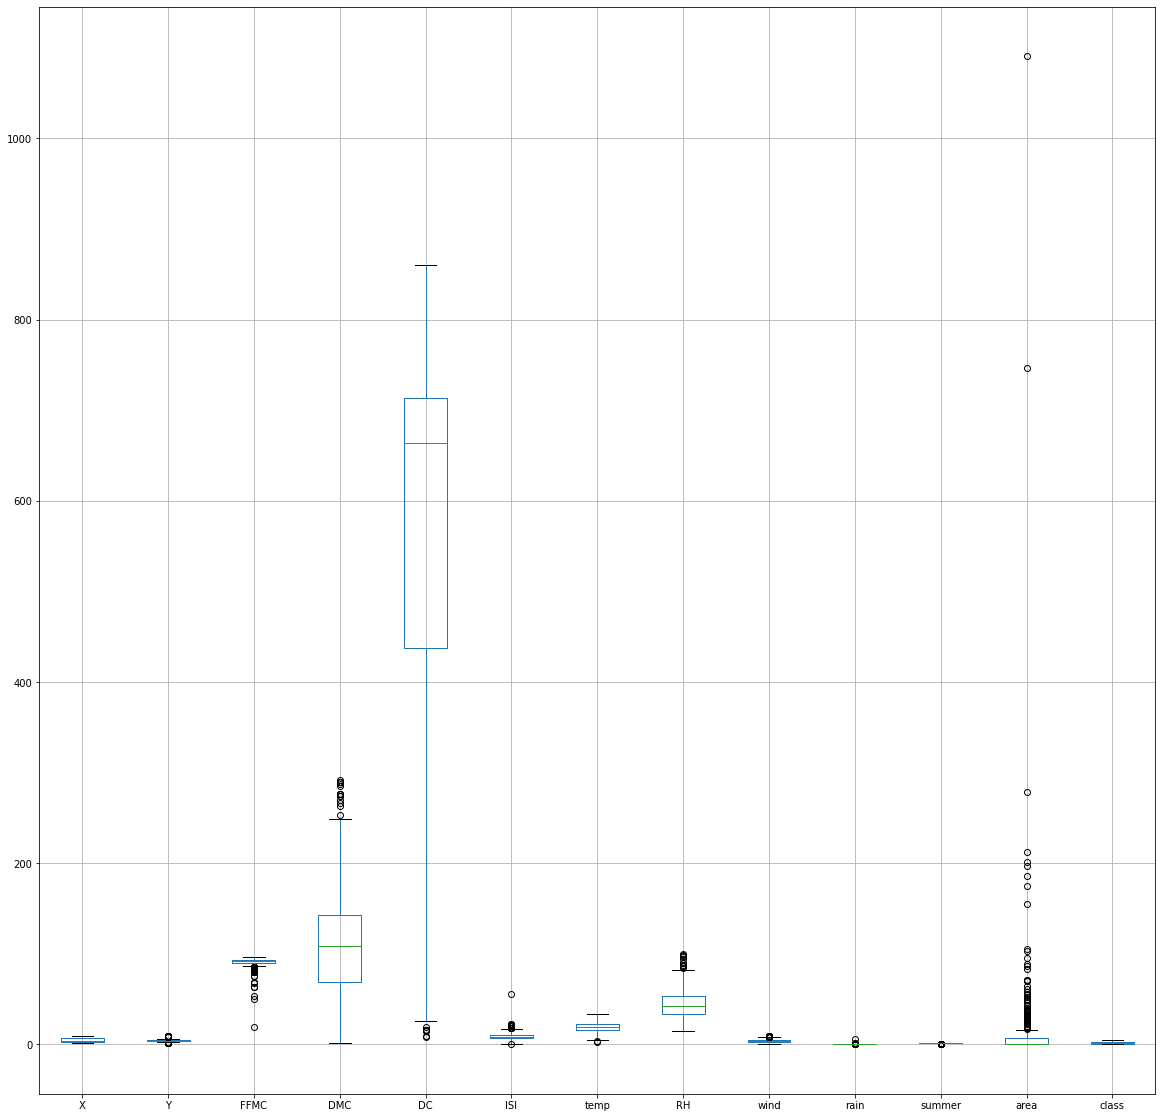

In [31]:
#Boxplot untuk melihat persebaran data & outliers
newDf.boxplot(figsize=(20, 20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f795ae82710>,
      dtype=object)

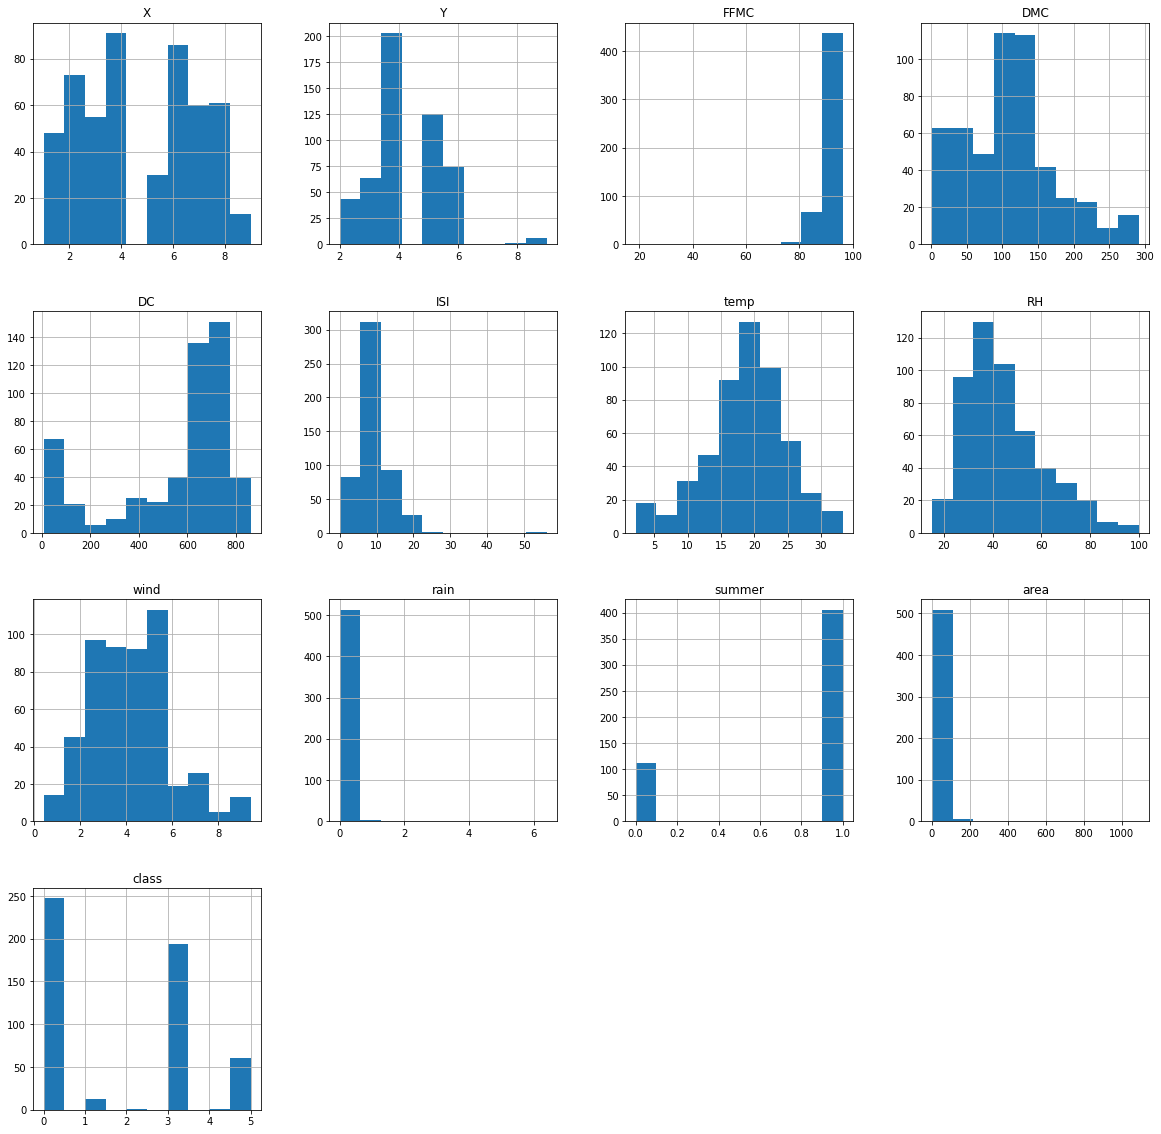

In [32]:
newDf.hist(figsize=(20, 20))

dari analisa awal, terlihat bahwa pada area,FFMC & rain, data cendrung skew ke satu sisi, sehingga dilakukan drop data berdasarkan beberapa kondisi

In [33]:
#drop data area yang memiliki luas > 100
temp = newDf[newDf['area']<=100].index
dfx = newDf.loc[temp,:]
dfx.shape

(506, 13)

In [34]:
#drop data FFMC yang memiliki nilai < 70
temp = dfx[dfx['FFMC']>=70].index
dfc = dfx.loc[temp,:]
dfc.shape

(499, 13)

In [35]:
#drop data rain yang memiliki nilai > 2
temp = dfc[dfc['rain']<=2].index
dfs = dfc.loc[temp,:]
dfs.shape

(498, 13)

In [36]:
#copy data
df = dfs
df.shape

(498, 13)

Dikarenakan nilai rain, area, FFMC dan ISI cendrung skewed ke salah satu sisi, maka dilakukan log transformation untuk mendekatkan nilai ke distribusi normal

In [37]:
#Log Transform
df['rain'] = np.sqrt(df['rain'])
df['area'] = np.sqrt(df['area'])
df['FFMC'] = np.sqrt(df['FFMC'])
df['ISI'] = np.sqrt(df['ISI'])

Lakukan normalisasi dengan stdscaler ke beberapa nilai lainnya

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['X', 'Y', 'DMC', 'DC', 
     'temp', 'RH', 'wind']] = scaler.fit_transform(df[['X', 'Y', 'DMC', 'DC', 
                                                                       'temp', 'RH', 'wind']])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f795a6163d0>,
      dtype=object)

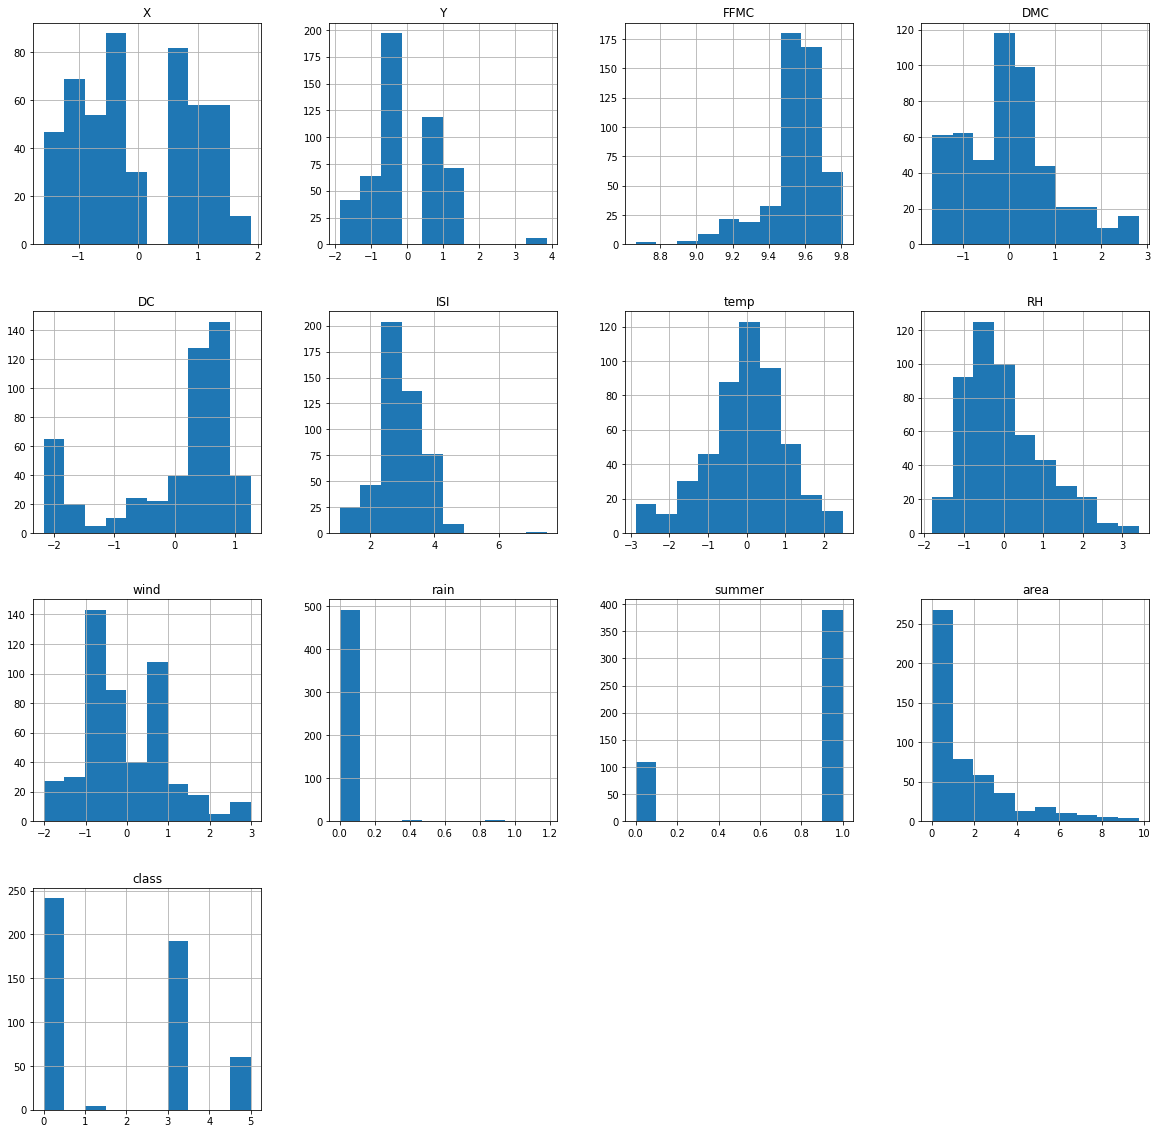

In [39]:
df.hist(figsize=(20, 20))

In [40]:
#drop data ISI dengan nilai lebih dari 6
temp = df[df['ISI']<6].index
dfN = df.loc[temp,:]
dfN.shape

(497, 13)

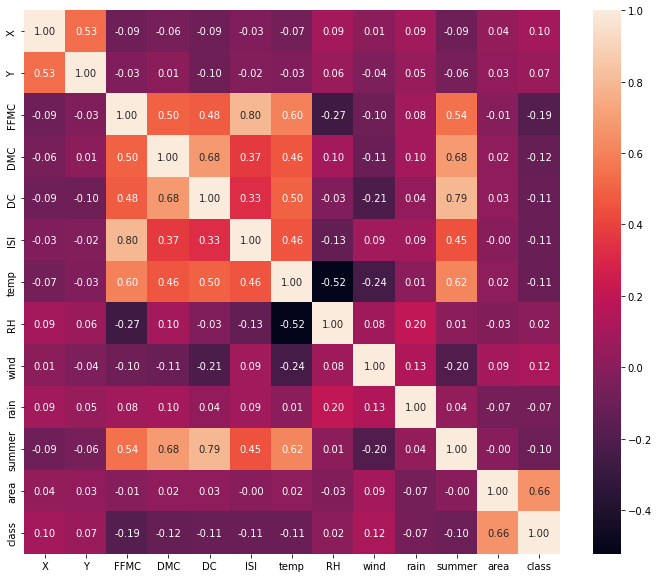

In [41]:
#melihat korelasi
plt.figure(figsize=(12, 10))
sns.heatmap(dfN.corr(), annot=True, fmt='.2f')

In [42]:
df = dfN[['FFMC','DMC', 'DC','wind', 'rain','summer', 'class', 'area']]

In [43]:
df.shape

(497, 8)

# **Modelling**

In [ ]:
pip install -q -U keras-tuner

In [49]:
pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 14.0 MB/s 


In [50]:
#Import Tensorflow dan extension
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split,KFold
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Activation
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.callbacks import  EarlyStopping
from tensorflow.keras import backend as K
from tensorflow.keras.backend import sigmoid
from tensorflow.keras.optimizers import Adam, Nadam, Adagrad, SGD, RMSprop, Adadelta

#Import keras tuner dan metrics untuk tuning parameter
import kerastuner as kt
from kerastuner.tuners import RandomSearch, BayesianOptimization, Sklearn
from sklearn import metrics
import tensorflow_addons as tfa

# Import label encoder 
from sklearn import preprocessing

import matplotlib.pyplot as plt
import time

## **Fungsi Model SAE**

SAE (Stacked Auto Encoder) merupakan salah satu bentuk model neural network yang terdiri dari beberapa layer AutoEncoder (AE) yang bertujuan untuk mempelajari karakteristik data. Tiap AE terdiri dari 3 layer, yaitu layer Encoder (berfungsi untuk mengubah representasi data), Bottleneck (menyimpan hasil encode), dan Decoder (mengubah kembali representasi data baru menjadi data awal). Pada kasus ini, SAE digunakan untuk mencari inisialisasi bobot optimal untuk model Deep Neural Network (DNN) nantinya. 

In [51]:
#Fungsi model SAE
def sae_model(xt, xv = None, EPOCHS = 100, opt = "adagrad",
              hl_node = 500, lr = 0.01,af = "relu",num_layers = 3, do=0.5, fr_node = 0.5,
              verbose = 0,return_fe = False):
  #Setting result placeholders
  xt_ae = [] ;xv_ae = [] ; w_ae = []
  #If validation set is not present, use train set as validation set
  if xv is None :
    xv = xt.copy()
  opt = tf.keras.optimizers.get(opt) #Set optimizer
  K.set_value(opt.learning_rate, lr) #Set learning rate

  #Stacked Autoencoder architecture
  for n_layers in range(num_layers):
    #Autoencoder
    inp = Input(shape=(xt.shape[1],))
    #Apply Dropout
    hidden_layer = Dropout(do)(inp)
    #Layer encoder (jumlah layer sesuai dengan n_layers)
    enc = Dense(int(hl_node*(fr_node**n_layers)), activation = af)(hidden_layer)  
    #Layer Decoder
    dec = Dense(xt.shape[1],activation="relu")(enc)
    ae = Model(inp, dec)
    #Compile model
    ae.compile(optimizer=opt, loss='mean_squared_error')
    #EarlyStop jika sudah konvergen 
    es = EarlyStopping(monitor='loss', patience=20, verbose=verbose)
    #Latih model
    ae.fit(xt, xt, 
           epochs=EPOCHS, 
           shuffle=True, callbacks = [es] , verbose = verbose,
           validation_data = (xv,xv))
    #Ekstrak Feature extraction
    fe = Model(ae.input, enc)
    #Simpan data hasil latih
    xt = fe.predict(xt) ; xt_ae.append(xt)
    xv = fe.predict(xv) ; xv_ae.append(xv)
    #Simpan bobot hasil latih SAE
    w_ae.append([layer_name for layer_name in ae.layers if "dense" in layer_name.name][0].get_weights())
    if verbose:
      print("Layer {} trained".format(n_layers+1))

  return (w_ae,xv) if return_fe else w_ae

## **Fungsi Model DNN**

Model DNN dibuat dalam bentuk fungsi untuk memudahkan proses modeling (tinggal memanggil fungsi saja). Proses pelatihan juga menggunakan proses BatchNormalization (normalisasi input tiap hidden layer) dan Dropout (proses mematikan beberapa node hidden layer secara acak selama proses pelatihan) dengan tujuan untuk mempercepat proses pelatihan

In [52]:
#Fungsi DNN
def dnn_model(xt, n_outputs = 1, sae_weights = None, EPOCHS = 100, opt = "adagrad",
              hl_node = 500, lr = 0.01,af = "relu",num_layers = 3, do=0.5, fr_node = 0.5):
  opt = tf.keras.optimizers.get(opt) #Set optimizer
  K.set_value(opt.learning_rate, lr) #Set learning rate
  
  #Model architecture
  input_layer = Input(shape=(xt.shape[1],))
  hidden_layer = BatchNormalization()(input_layer)
  hidden_layer = Dropout(do)(hidden_layer)
#Set jumlah hidden layer
  for n_layers in range(num_layers):
    hidden_layer = Dense(int(hl_node*(fr_node**n_layers)), activation = af)(hidden_layer)
    hidden_layer = BatchNormalization()(hidden_layer)
    hidden_layer = Dropout(do)(hidden_layer)
  output_layer = Dense(n_outputs, activation = 'relu')(hidden_layer)
#latih model
  dnn = Model(input_layer, output_layer)

  #Latih model DNN dengan bobot SAE (jika bobot ada)
  if sae_weights is not None:
    weights = sae_weights
    dnn_dense = [layer_name for layer_name in dnn.layers if "dense" in layer_name.name]
    for weight_from,weight_to in list(zip(weights,dnn_dense)):
      weight_to.set_weights(weight_from)

  #Compile model
  dnn.compile(optimizer=opt, loss='mean_squared_error', metrics = ['mse', 'mae'])
  return dnn

## **Skenario 1: Latih model dengan semua fitur data**

In [53]:
dataset = df

Pisahkan Data train dan test

In [54]:
X = dataset.iloc[:377,:-1]
Y = np.array(dataset.iloc[:377,-1])
# X_sep
X_test = dataset.iloc[377:,:-1]
Y_test = np.array(dataset.iloc[377:,-1])
X

,FFMC,DMC,DC,wind,rain,summer,class
0,9.284396,-1.326598,-1.825286,1.488396,0.000000,0,0.0
1,9.518403,-1.182644,0.487181,-1.739386,0.000000,0,0.0
2,9.518403,-1.052774,0.558791,-1.516780,0.000000,0,0.0
3,9.576012,-1.215503,-1.892874,-0.014192,0.447214,0,0.0
4,9.449868,-0.933856,-1.793504,-1.238523,0.000000,0,0.0
...,...,...,...,...,...,...,...
387,9.607289,-0.347089,-0.430887,-0.236798,0.000000,1,3.0
388,9.507891,-0.336136,-1.034751,-1.238523,0.000000,1,5.0
389,9.507891,-0.276677,-1.005383,0.764928,0.000000,1,5.0
390,9.465728,-0.420631,0.669024,0.764928,0.000000,1,3.0


## **Latih model**
Menggunakan KFold Cross Validation K = 5

In [55]:
#Train SAE-DNN
#Variabel untuk simpan hasil
mse_results = list()
mae_results = list()
r2_results = list()
#Latih SAE 
print("finding sae weights....")
ti0 = time.time()
sae_weights = sae_model(xt = X)
ti1 = time.time()
print('done, processing time:', ti1-ti0)
i=0
t0 = time.time()
#Inisialisasi CV
np.random.seed(123)
cv = KFold(n_splits=5, random_state=42, shuffle=True)
#Mulai latih DNN dengan bobot hasil SAE untuk tiap CV
for train_ix, val_ix in cv.split(X):
    #Bagi data menjadi train, val
    X_train, X_val = X.iloc[train_ix,:], X.iloc[val_ix,:]
    y_train, y_val = Y[train_ix], Y[val_ix]
    # define model dengan bobot SAE. Jika tidak memakai bobot SAE, sae_weights = None
    # latih model
    #EarlyStop jika sudah konvergen 
    es = EarlyStopping(monitor='val_loss', patience=20, verbose=1)
    model = dnn_model(xt = X_train, sae_weights = sae_weights)
    history = model.fit(X_train, y_train, verbose=False, epochs=400, validation_data=(X_val, y_val), callbacks = [es])
    # Prediksi test 
    yhat = model.predict(X_test)
    # Hitung metrik
    mse = mean_squared_error(Y_test, yhat)
    r2 = r2_score(Y_test,yhat)
    mae = mean_absolute_error(Y_test,yhat)
    # Simpan hasil
    print("CV number: ", i)
    print('MSE of :>%.3f' % mse)
    print('MAE of :>%.3f' % mae)
    print('R2 of :>%.3f' % r2)
    mse_results.append(mse)
    mae_results.append(mae)
    r2_results.append(r2)
    i=i+1
t1 = time.time()
print("waktu proses", t1-t0)
print("MSE array:", mse_results)
print("MAE array:", mae_results)
print("R2 array:", r2_results)

finding sae weights....
12/12 [==============================] - 0s 2ms/step
done, processing time: 29.759187698364258
Epoch 91: early stopping
4/4 [==============================] - 0s 5ms/step
CV number:  0
MSE of :>4.999
MAE of :>1.512
R2 of :>-0.360
Epoch 67: early stopping
4/4 [==============================] - 0s 5ms/step
CV number:  1
MSE of :>4.502
MAE of :>1.412
R2 of :>-0.225
Epoch 88: early stopping
4/4 [==============================] - 0s 5ms/step
CV number:  2
MSE of :>4.470
MAE of :>1.414
R2 of :>-0.216
Epoch 95: early stopping
4/4 [==============================] - 0s 4ms/step
CV number:  3
MSE of :>4.156
MAE of :>1.390
R2 of :>-0.131
Epoch 67: early stopping
4/4 [==============================] - 0s 4ms/step
CV number:  4
MSE of :>5.259
MAE of :>1.517
R2 of :>-0.430
waktu proses 51.17469525337219
MSE array: [4.99903674791924, 4.50209139984483, 4.469582441406753, 4.156395081696916, 5.258916063671941]
MAE array: [1.5119466561457684, 1.4120774654971853, 1.4139011596078022

In [56]:
print('===================================')
print('SAE-DNN PERFORMANCE')
print('MSE         : {0:.5f}±{1:.3f}'.format(np.mean(mse_results), np.std(mse_results)))
print('MAE         : {0:.5f}±{1:.3f}'.format(np.mean(mae_results), np.std(mae_results)))
print('R2 Score    : {0:.5f}±{1:.3f}'.format(np.mean(r2_results), np.std(r2_results)))

SAE-DNN PERFORMANCE
MSE         : 4.67720±0.397
MAE         : 1.44902±0.054
R2 Score    : -0.27220±0.108


## **Tuning Hyperparameter**
Dilakukan untuk mencari hyperparameter optimal DNN menggunakan BayesianOptimization. BayesianOptimization mengevaluasi informasi pada model iterasi sebelumnya untuk memilih hyperparameter terbaik untuk membangun model selanjutnya hingga didapat model dengan hyperparam terbaik. 


In [57]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=1, shuffle = True)

In [59]:
# Mount to Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

GDRIVE_PATH = 'gdrive/My Drive/Google Colab/'

Mounted at /content/gdrive


In [60]:
#Fungsi model untuk tuning
def build_model(hp):
    #Isi parameter yang akan dituning
    params = {
              'hl_node' : hp.Choice('units',values = [300,342,377,400,500,600,700,774]),
              'lr' : hp.Choice('learning_rate',values=[x for x in np.linspace(0.01,0.05,5)]),
              'num_layers' : hp.Choice('num_layers',values=[1,2,3,4,5]),
              'do' : hp.Choice('dropout_rate',values=[x for x in np.linspace(0.1,0.5,5)]),
              'fr_node' : hp.Choice('fraction_node',values=[0.5,0.66,0.75])
              }
    #Latih model SAE
    sae_weights = sae_model(xt = X, EPOCHS= 100,**params)
    #Latih model DNN dengan bobot SAE
    sae_dnn = dnn_model(X_train, sae_weights=sae_weights, EPOCHS= 100,**params)
    return sae_dnn
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience = 20)
# Fungsi Bayesian Optimization di Keras Tuner.
tuner = BayesianOptimization(build_model,
    # Metrik yang dicari optimalnya
    objective= kt.Objective("val_loss", direction="min"), 
    # Jumlah percobaan
    max_trials=25,
    executions_per_trial=1,
    # Folder simpan hasil tuning
    directory='gdrive/My Drive/Google Colab/',
    project_name='SAE-DNN Forest fires', overwrite = True)
#Jalankan Keras Tuner u
tuner.search(X_train, y_train, epochs=100, validation_data=(X_val, y_val),callbacks=[stop_early])
#Tampilkan hasil terbaik
tuner.results_summary()

Trial 25 Complete [00h 00m 14s]
val_loss: 1.389070749282837

Best val_loss So Far: 1.2345057725906372
Total elapsed time: 00h 17m 35s
Results summary
Results in gdrive/My Drive/Google Colab/SAE-DNN Forest fires
Showing 10 best trials
Trial summary
Hyperparameters:
units: 774
learning_rate: 0.05
num_layers: 1
dropout_rate: 0.5
fraction_node: 0.75
Score: 1.2345057725906372
Trial summary
Hyperparameters:
units: 774
learning_rate: 0.04
num_layers: 2
dropout_rate: 0.5
fraction_node: 0.75
Score: 1.2451882362365723
Trial summary
Hyperparameters:
units: 300
learning_rate: 0.05
num_layers: 1
dropout_rate: 0.5
fraction_node: 0.75
Score: 1.2651931047439575
Trial summary
Hyperparameters:
units: 774
learning_rate: 0.04
num_layers: 1
dropout_rate: 0.5
fraction_node: 0.66
Score: 1.2691965103149414
Trial summary
Hyperparameters:
units: 400
learning_rate: 0.05
num_layers: 1
dropout_rate: 0.5
fraction_node: 0.75
Score: 1.2776353359222412
Trial summary
Hyperparameters:
units: 774
learning_rate: 0.03
num_

## **Latih ulang model dengan hyperparameter optimal**

In [62]:
#Train SAE-DNN
#Variabel untuk simpan hasil
mse_results = list()
mae_results = list()
r2_results = list()
#Latih SAE 
print("finding sae weights....")
ti0 = time.time()
sae_weights = sae_model(xt = X, hl_node = 774, lr =0.01, num_layers = 1, do = 0.3, fr_node = 0.66)
ti1 = time.time()
print('done, processing time:', ti1-ti0)
i=0
t0 = time.time()
#Inisialisasi CV
np.random.seed(123)
cv = KFold(n_splits=5, random_state=42, shuffle=True)
#Mulai latih DNN dengan bobot hasil SAE untuk tiap CV
for train_ix, val_ix in cv.split(X):
    #Bagi data menjadi train, val
    X_train, X_val = X.iloc[train_ix,:], X.iloc[val_ix,:]
    y_train, y_val = Y[train_ix], Y[val_ix]
    # define model dengan bobot SAE. Jika tidak memakai bobot SAE, sae_weights = None
    # latih model
    #EarlyStop jika sudah konvergen 
    es = EarlyStopping(monitor='val_loss', patience=50, verbose=1)
    model = dnn_model(xt = X_train, sae_weights = sae_weights, hl_node = 774, lr =0.01, num_layers = 1, do = 0.3, fr_node = 0.66)
    history = model.fit(X_train, y_train, verbose=False, epochs=400, validation_data=(X_val, y_val), callbacks = [es])
    # Prediksi test 
    yhat = model.predict(X_test)
    # Hitung metrik
    mse = mean_squared_error(Y_test, yhat)
    r2 = r2_score(Y_test,yhat)
    mae = mean_absolute_error(Y_test,yhat)
    # Simpan hasil
    print("CV number: ", i)
    print('MSE of :>%.3f' % mse)
    print('MAE of :>%.3f' % mae)
    print('R2 of :>%.3f' % r2)
    mse_results.append(mse)
    mae_results.append(mae)
    r2_results.append(r2)
    i=i+1
t1 = time.time()
print("waktu proses", t1-t0)
print("MSE array:", mse_results)
print("MAE array:", mae_results)
print("R2 array:", r2_results)

finding sae weights....
12/12 [==============================] - 0s 2ms/step
done, processing time: 5.753068923950195
Epoch 124: early stopping
4/4 [==============================] - 0s 7ms/step
CV number:  0
MSE of :>4.483
MAE of :>1.546
R2 of :>-0.219
Epoch 248: early stopping
4/4 [==============================] - 0s 3ms/step
CV number:  1
MSE of :>4.582
MAE of :>1.524
R2 of :>-0.246
Epoch 187: early stopping
4/4 [==============================] - 0s 4ms/step
CV number:  2
MSE of :>4.338
MAE of :>1.502
R2 of :>-0.180
Epoch 91: early stopping
4/4 [==============================] - 0s 4ms/step
CV number:  3
MSE of :>4.369
MAE of :>1.532
R2 of :>-0.188
Epoch 138: early stopping
4/4 [==============================] - 0s 3ms/step
CV number:  4
MSE of :>4.444
MAE of :>1.538
R2 of :>-0.209
waktu proses 74.75855898857117
MSE array: [4.483321995891697, 4.581563146787035, 4.338355101865411, 4.368691554324132, 4.444445157648422]
MAE array: [1.546463324961469, 1.5244543202280818, 1.502072058752

In [63]:
print('===================================')
print('SAE-DNN PERFORMANCE')
print('MSE         : {0:.5f}±{1:.3f}'.format(np.mean(mse_results), np.std(mse_results)))
print('MAE         : {0:.5f}±{1:.3f}'.format(np.mean(mae_results), np.std(mae_results)))
print('R2 Score    : {0:.5f}±{1:.3f}'.format(np.mean(r2_results), np.std(r2_results)))

SAE-DNN PERFORMANCE
MSE         : 4.44328±0.086
MAE         : 1.52865±0.015
R2 Score    : -0.20857±0.023


## **Plot hasil prediksi dengan nilai asli**

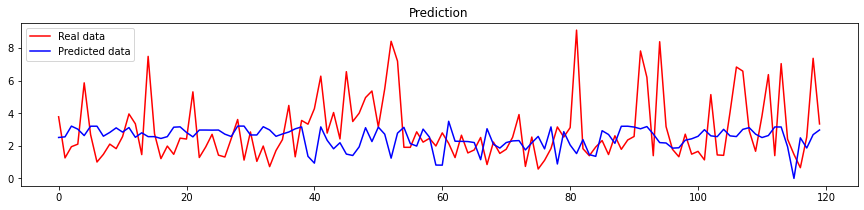

In [64]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 3))
plt.plot(Y_test, color = 'red', label = 'Real data')
plt.plot(yhat, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()

## **Plot MSE dan val_mse selama pelatihan model**

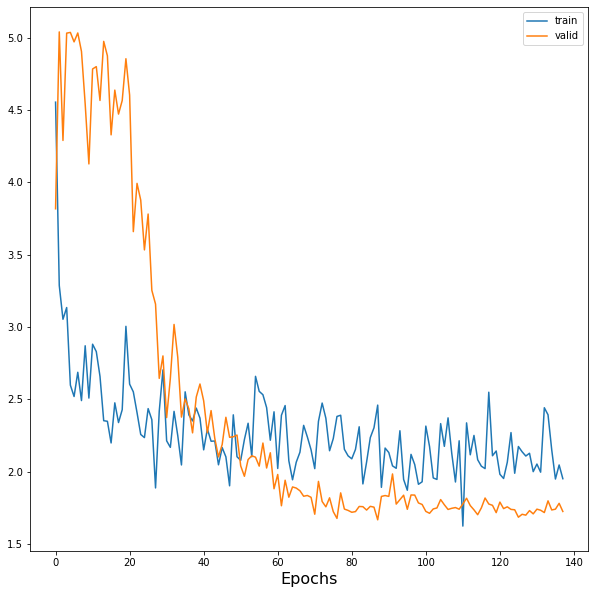

In [65]:
plt.figure(figsize=(10, 10))
plt.plot(history.history['mse'], label='train')
plt.plot(history.history['val_mse'], label='valid')
plt.xlabel('Epochs', fontsize=16)
plt.legend()